# SGDClassifier

- LogisiticRegression + SGD(확률적 경사하강법) 적용한 분류
- 필수 파라미터 => 손실함수 설정

In [208]:
# 모듈 로딩 ----------------------------------------------------
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [209]:
# 경고 무시 -------------------------
# 향후 deprecated 된다는 경고 출력 막음
import warnings
warnings.filterwarnings(action='ignore')

In [210]:
df = pd.read_csv('../../Data/fish.csv')

In [211]:
# feature 5개, target 1개
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [212]:
df.isna().sum()

Species     0
Weight      0
Length      0
Diagonal    0
Height      0
Width       0
dtype: int64

In [213]:
data = df.iloc[:,1:].to_numpy()
target = df.iloc[:,0].to_numpy()

In [214]:
## 학습용, 테스트용 데이터 분리 => 8:2
## random_state : 학습 시 랜덤한 동일 데이터로 진행 위해 사용
train_input, test_input, train_target, test_target = train_test_split(data, target,
                                                                     random_state=42) 

In [215]:
## 표준화 평균 0, 표준편차 1
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [216]:
# 최적화 경사하강법 변경 => BGD => SGD 손실함수
# loss = 손실함수 : 모델에 따라 다름 ==> 'log' 곧 deprecated 예정
# max_iter = 1000 기본값 : 학습 횟수
# sc = SGDClassifier(loss = 'log',
#                  max_iter=1000,
#                  random_state=42)
# 반복 횟수 즉 max_iter 만큼 실행
#sc.fit(train_scaled, train_target)

#print(sc.score(train_scaled,train_target))
#print(sc.score(test_scaled,test_target))

In [217]:
# partial_fit() - 1 epoch만 학습 실해
# sc.partial_fit(train_scaled, train_target)

In [218]:
#print(sc.score(train_scaled,train_target))
#print(sc.score(test_scaled,test_target))

In [219]:
classes = np.unique(train_target)

In [220]:
## 최적의 학습 횟수 찾기
train_score = []
test_score = []
for i in range(0,100):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

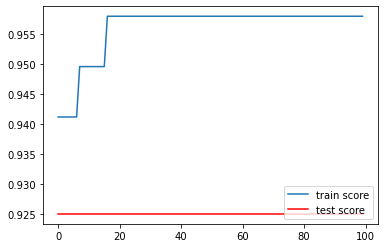

In [221]:
plt.plot(train_score, label = 'train score')
plt.plot(test_score, label = 'test score', color='red')
plt.legend(loc=4)
plt.show()

In [243]:
# early_stopping : 조기종료 여부(기:False)
# n_iter_no_change : n번 동안 변경 되지 않은 경우 early_stopping 이 True 
# tol : 성능 개선의 기준값
sc = SGDClassifier(loss = 'log',
                  max_iter=1000,
                  random_state=42,
                  n_iter_no_change=20,
                  early_stopping=False)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.n_iter_)

0.9411764705882353
0.925
123
